In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\Administrator\Desktop\Takeout\adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

There 32561 rows and 15 columns in the Adult dataset

In [5]:
df.isnull().values.any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


information on the data set shows that there are no missing values,but dataset shows ? is present.hence replacing ? with nan values.

In [7]:
# replacing ? with Nan values
df=df.replace('?',np.nan)

In [8]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Observation:
now the dataset shows workclass,occupation ,native.country having null values.
since all the datatypes are categorical we can impute columns with mode.

In [9]:
for col in['workclass','occupation','native.country']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [12]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [13]:
df_income=pd.DataFrame(df)
df_income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [14]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
# converting our targent variable which is object type to int type to analyse data with target

In [16]:
df_income['income']=df_income['income'].map({'<=50K':0,'>50K':1})

In [17]:
df_income['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

# Exploring Data Variables

In [18]:
#printing object Data type and their unique values
for column in df_income.columns:
    if df_income[column].dtypes==object:
        print(str(column) +':'+ str(df_income[column].unique()))
        print(df_income[column].value_counts())
        print('*************************************************************************')
        print('\n')

workclass:['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
*************************************************************************


education:['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

# univariate analysis

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


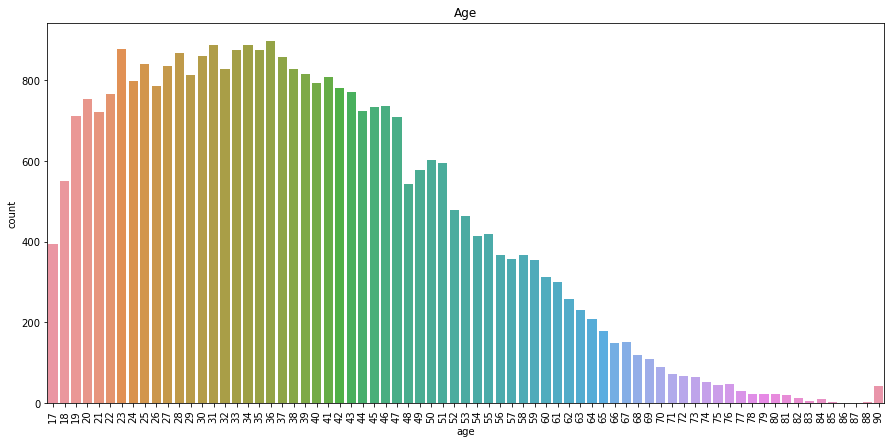

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(df['age'])
plt.title('Age')
plt.xticks(rotation=90)
plt.show()

observation:
    Maximum density of age is concentrated b/w 17 to 50

Text(0.5, 1.0, 'fnlwgt')

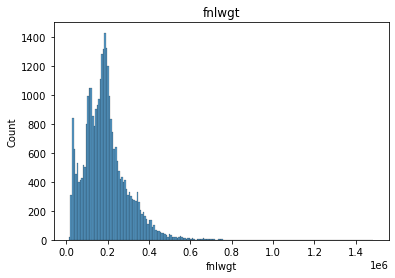

In [20]:
sns.histplot(df['fnlwgt'])
plt.title('fnlwgt')

Observation:
    maximum density of Final weight lies in the range of 0.1 to 0.4

Text(0.5, 1.0, 'education.num')

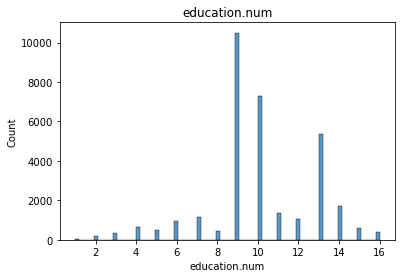

In [21]:
sns.histplot(df['education.num'])
plt.title('education.num')

Text(0.5, 1.0, 'capital.gain')

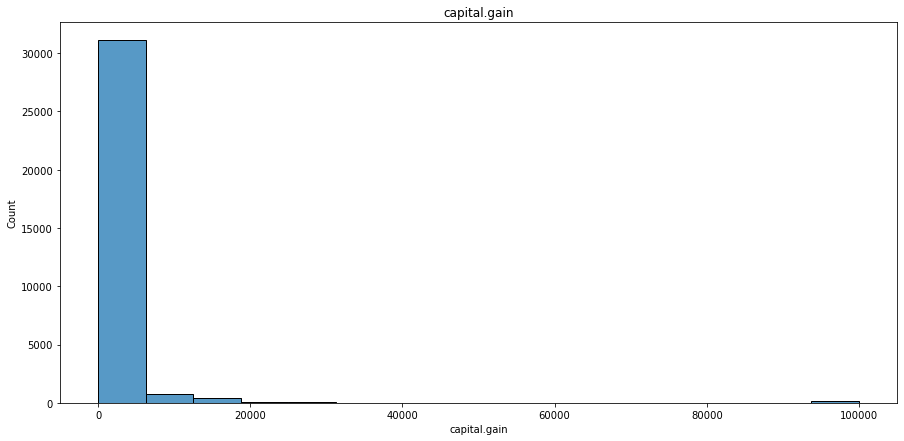

In [22]:
plt.figure(figsize=(15,7))
sns.histplot(df['capital.gain'])
plt.title('capital.gain')

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital.loss, Length: 92, dtype: int64


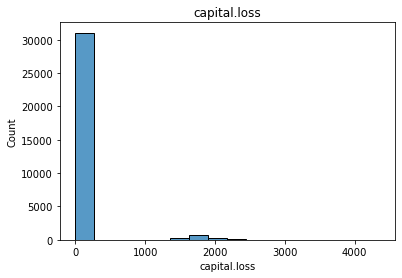

In [23]:
sns.histplot(df['capital.loss'])
plt.title('capital.loss')

print(df_income['capital.loss'].value_counts())

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours.per.week, Length: 94, dtype: int64


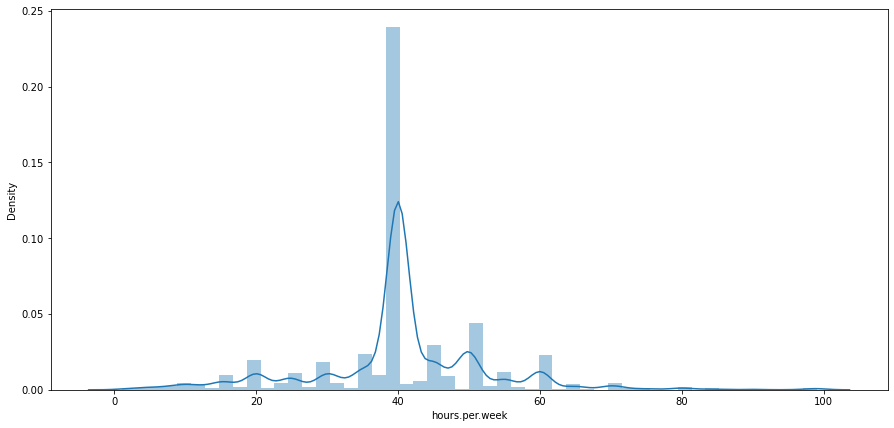

In [24]:
plt.figure(figsize=(15,7))
sns.distplot(df['hours.per.week'])


print(df_income['hours.per.week'].value_counts())

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


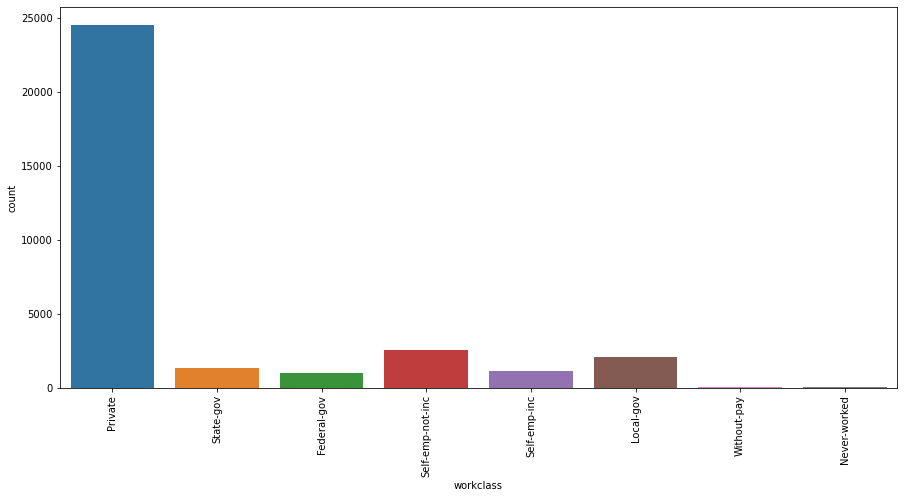

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(df['workclass'])
plt.xticks(rotation=90)
print(df_income['workclass'].value_counts())

observation :
    maximum no of people work in private.

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


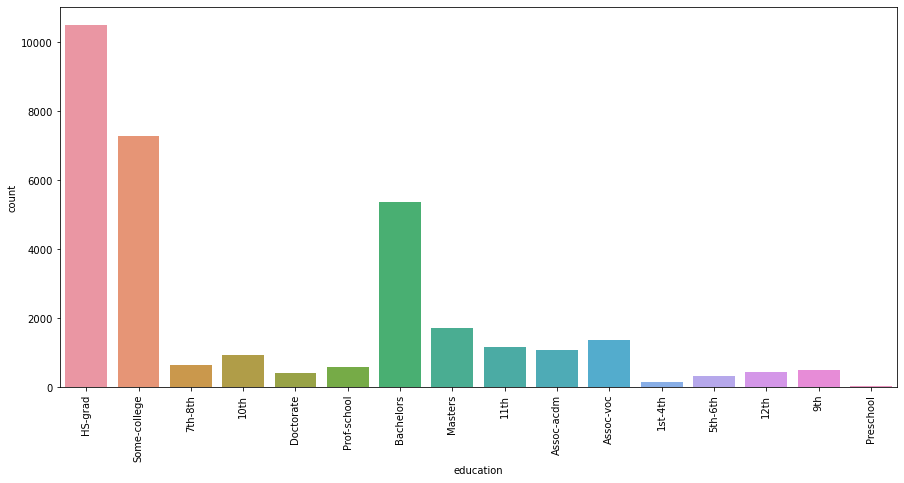

In [26]:

plt.figure(figsize=(15,7))
sns.countplot(df['education'])
plt.xticks(rotation=90)
print(df_income['education'].value_counts())

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64


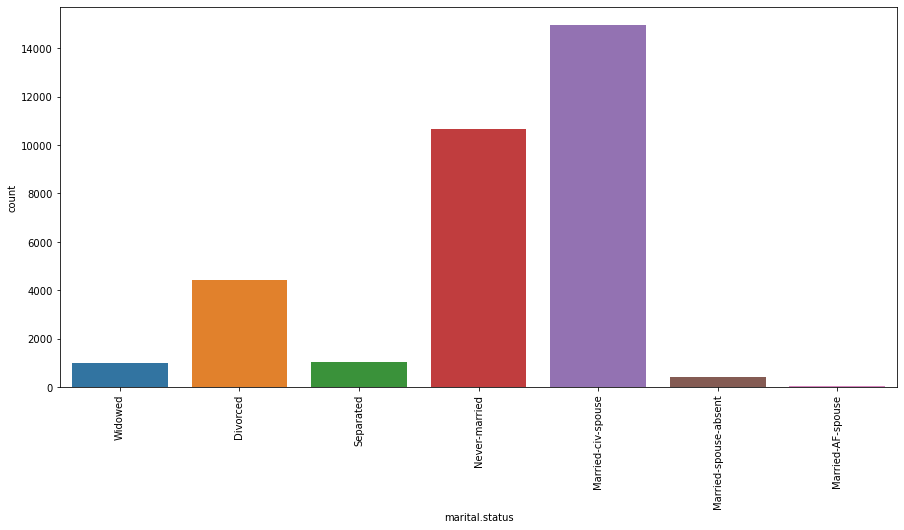

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(df['marital.status'])
plt.xticks(rotation=90)
print(df_income['marital.status'].value_counts())

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


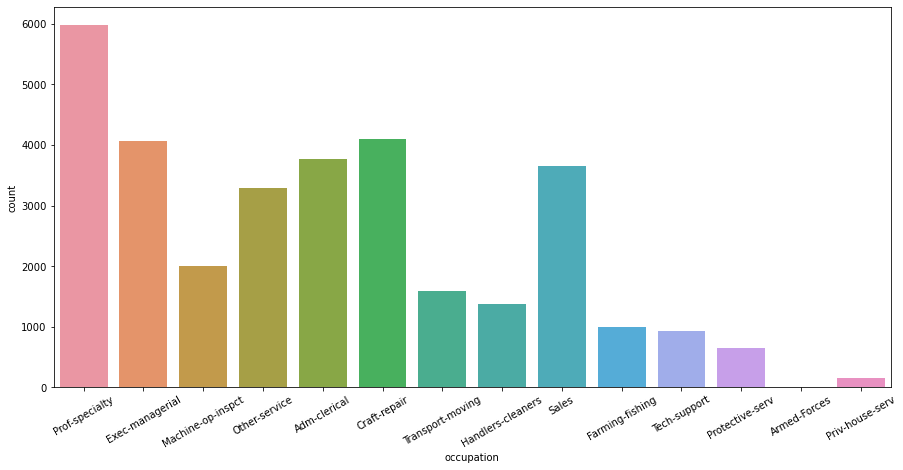

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(df['occupation'])
plt.xticks(rotation=30)
print(df_income['occupation'].value_counts())

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


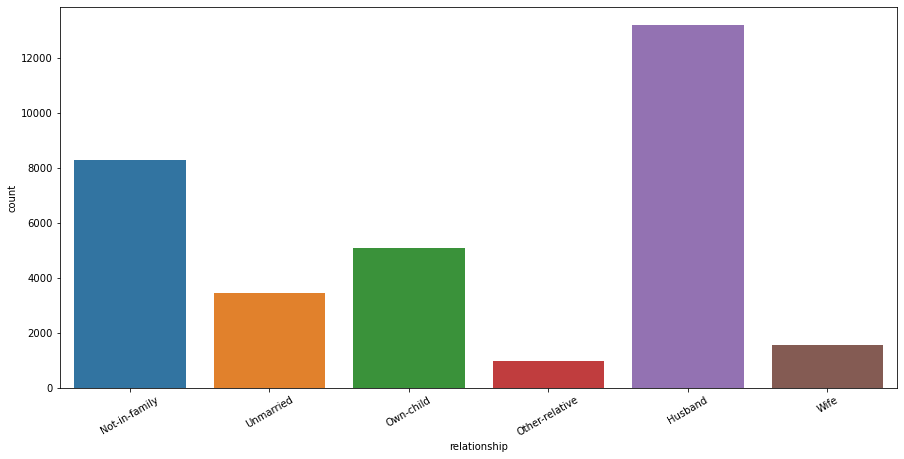

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(df['relationship'])
plt.xticks(rotation=30)
print(df_income['relationship'].value_counts())

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


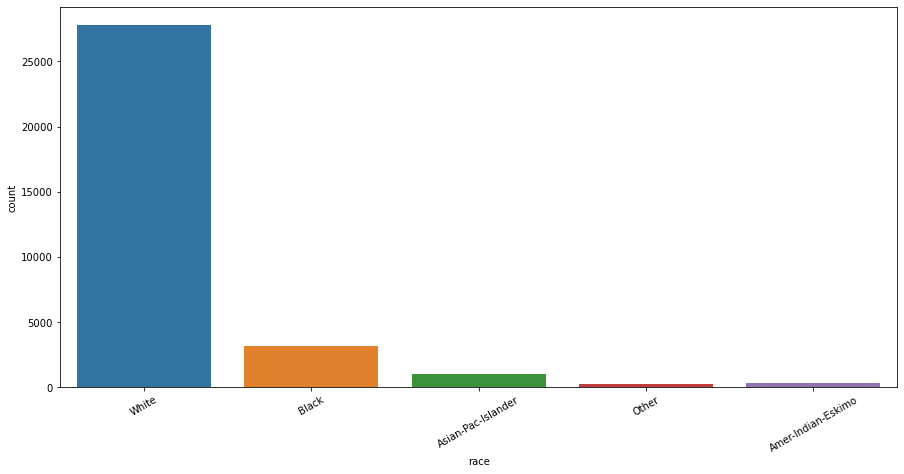

In [30]:
plt.figure(figsize=(15,7))
sns.countplot(df['race'])
plt.xticks(rotation=30)
print(df_income['race'].value_counts())

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Male      21790
Female    10771
Name: sex, dtype: int64


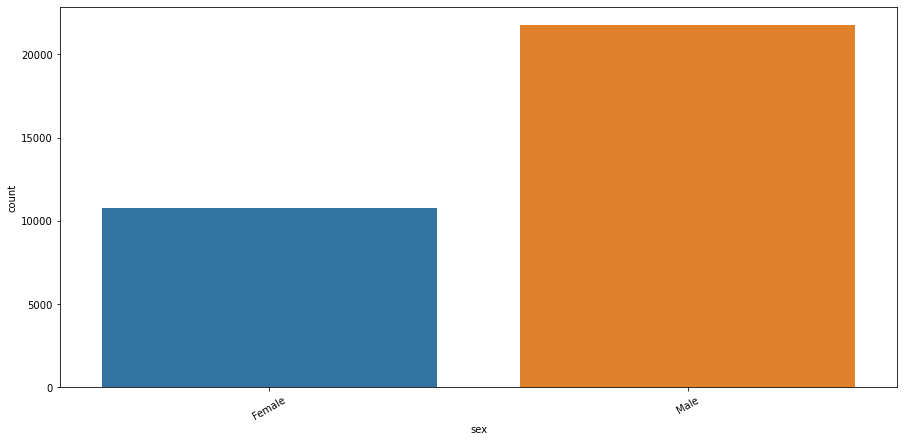

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(df['sex'])
plt.xticks(rotation=30)
print(df_income['sex'].value_counts())

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

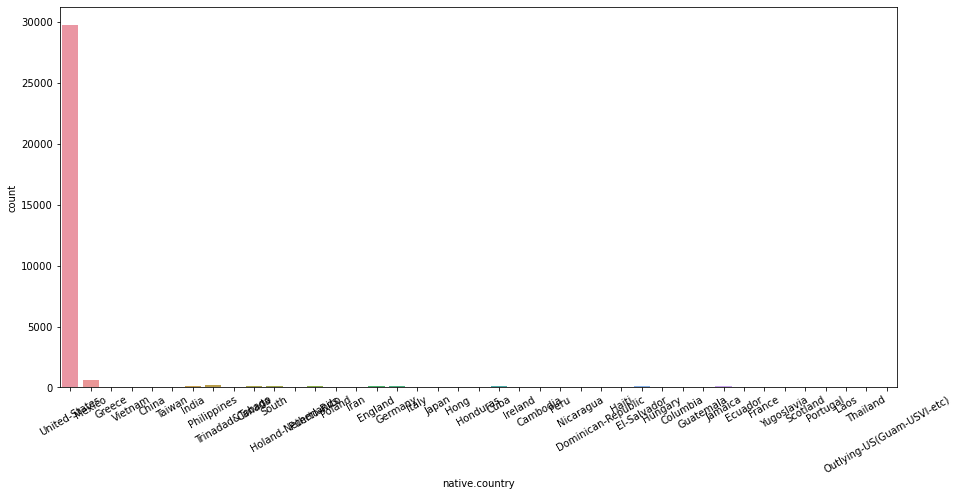

In [32]:
plt.figure(figsize=(15,7))
sns.countplot(df['native.country'])
plt.xticks(rotation=30)
print(df_income['native.country'].value_counts())

we can observe that 40 hours.per.week has the highest count

# Bivariate Analysis

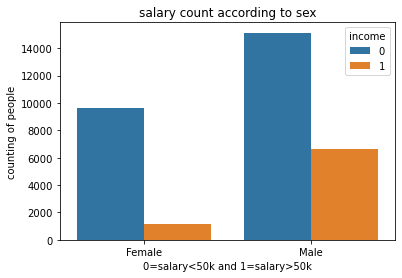

sex     income
Female  0          9592
        1          1179
Male    0         15128
        1          6662
Name: income, dtype: int64


In [33]:
sns.countplot(x="sex",hue='income',data=df_income)
plt.title("salary count according to sex")
plt.xlabel('0=salary<50k and 1=salary>50k')
plt.ylabel('counting of people')
plt.show()

print(df_income.groupby('sex')['income'].value_counts())

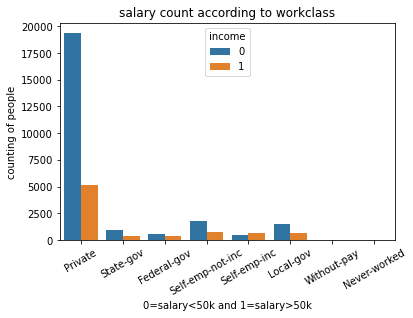

workclass         income
Federal-gov       0           589
                  1           371
Local-gov         0          1476
                  1           617
Never-worked      0             7
Private           0         19378
                  1          5154
Self-emp-inc      1           622
                  0           494
Self-emp-not-inc  0          1817
                  1           724
State-gov         0           945
                  1           353
Without-pay       0            14
Name: income, dtype: int64


In [34]:
sns.countplot(x="workclass",hue='income',data=df_income)
plt.title("salary count according to workclass")
plt.xlabel('0=salary<50k and 1=salary>50k')
plt.xticks(rotation=30)
plt.ylabel('counting of people')
plt.show()

print(df_income.groupby('workclass')['income'].value_counts())

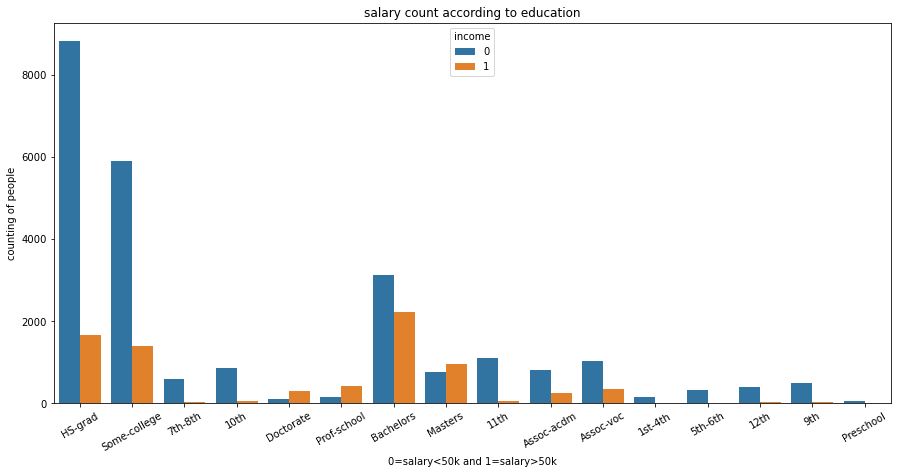

education     income
10th          0          871
              1           62
11th          0         1115
              1           60
12th          0          400
              1           33
1st-4th       0          162
              1            6
5th-6th       0          317
              1           16
7th-8th       0          606
              1           40
9th           0          487
              1           27
Assoc-acdm    0          802
              1          265
Assoc-voc     0         1021
              1          361
Bachelors     0         3134
              1         2221
Doctorate     1          306
              0          107
HS-grad       0         8826
              1         1675
Masters       1          959
              0          764
Preschool     0           51
Prof-school   1          423
              0          153
Some-college  0         5904
              1         1387
Name: income, dtype: int64


In [35]:
plt.figure(figsize=(15,7))
sns.countplot(x="education",hue='income',data=df_income)
plt.title("salary count according to education")
plt.xlabel('0=salary<50k and 1=salary>50k')
plt.xticks(rotation=30)
plt.ylabel('counting of people')
plt.show()

print(df_income.groupby('education')['income'].value_counts())

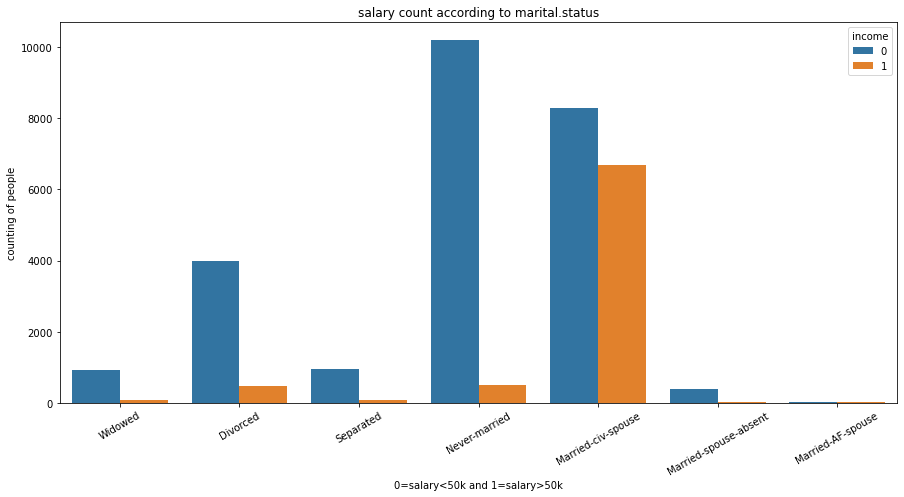

marital.status         income
Divorced               0          3980
                       1           463
Married-AF-spouse      0            13
                       1            10
Married-civ-spouse     0          8284
                       1          6692
Married-spouse-absent  0           384
                       1            34
Never-married          0         10192
                       1           491
Separated              0           959
                       1            66
Widowed                0           908
                       1            85
Name: income, dtype: int64


In [36]:
plt.figure(figsize=(15,7))
sns.countplot(x="marital.status",hue='income',data=df_income)
plt.title("salary count according to marital.status")
plt.xlabel('0=salary<50k and 1=salary>50k')
plt.xticks(rotation=30)
plt.ylabel('counting of people')
plt.show()

print(df_income.groupby('marital.status')['income'].value_counts())

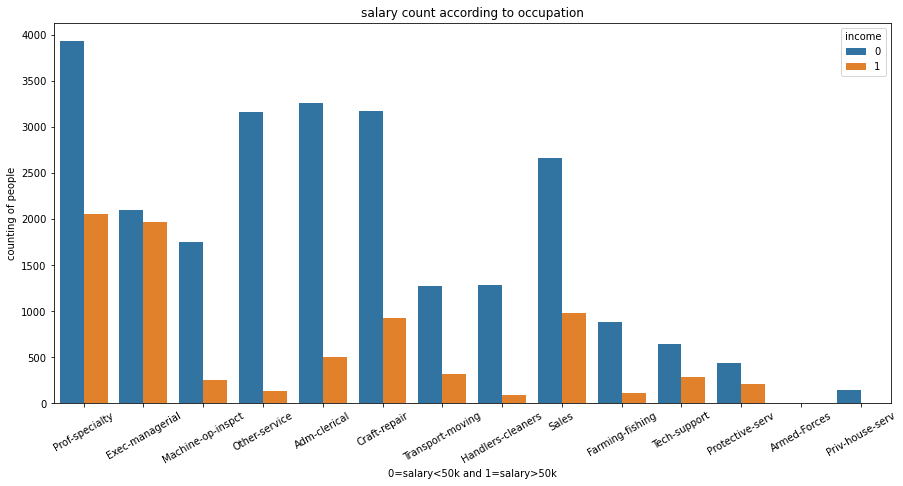

occupation         income
Adm-clerical       0         3263
                   1          507
Armed-Forces       0            8
                   1            1
Craft-repair       0         3170
                   1          929
Exec-managerial    0         2098
                   1         1968
Farming-fishing    0          879
                   1          115
Handlers-cleaners  0         1284
                   1           86
Machine-op-inspct  0         1752
                   1          250
Other-service      0         3158
                   1          137
Priv-house-serv    0          148
                   1            1
Prof-specialty     0         3933
                   1         2050
Protective-serv    0          438
                   1          211
Sales              0         2667
                   1          983
Tech-support       0          645
                   1          283
Transport-moving   0         1277
                   1          320
Name: income, dtype: i

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(x="occupation",hue='income',data=df_income)
plt.title("salary count according to occupation")
plt.xlabel('0=salary<50k and 1=salary>50k')
plt.xticks(rotation=30)
plt.ylabel('counting of people')
plt.show()

print(df_income.groupby('occupation')['income'].value_counts())

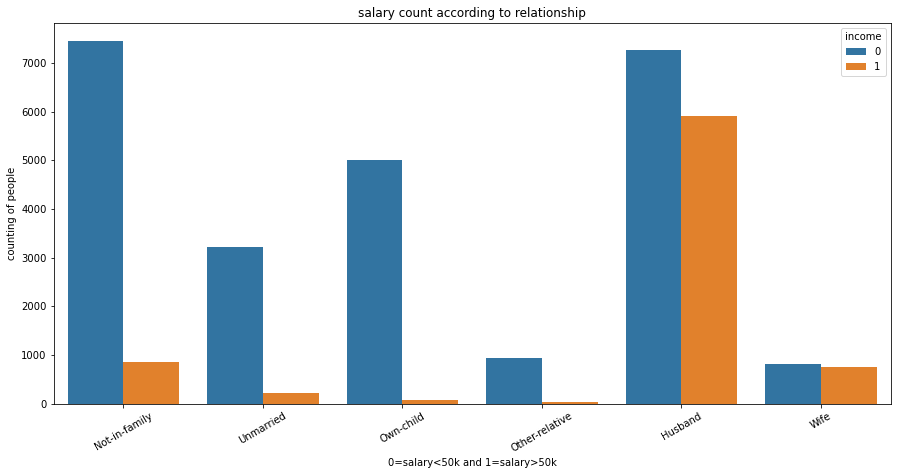

relationship    income
Husband         0         7275
                1         5918
Not-in-family   0         7449
                1          856
Other-relative  0          944
                1           37
Own-child       0         5001
                1           67
Unmarried       0         3228
                1          218
Wife            0          823
                1          745
Name: income, dtype: int64


In [38]:
plt.figure(figsize=(15,7))
sns.countplot(x="relationship",hue='income',data=df_income)
plt.title("salary count according to relationship")
plt.xlabel('0=salary<50k and 1=salary>50k')
plt.xticks(rotation=30)
plt.ylabel('counting of people')
plt.show()

print(df_income.groupby('relationship')['income'].value_counts())

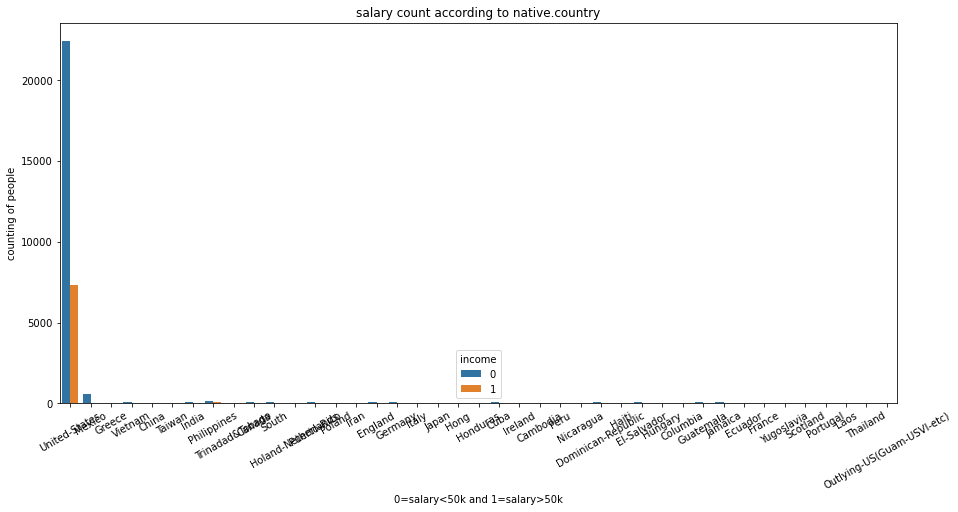

native.country  income
Cambodia        0           12
                1            7
Canada          0           82
                1           39
China           0           55
                          ... 
United-States   1         7317
Vietnam         0           62
                1            5
Yugoslavia      0           10
                1            6
Name: income, Length: 80, dtype: int64


In [39]:
plt.figure(figsize=(15,7))
sns.countplot(x="native.country",hue='income',data=df_income)
plt.title("salary count according to native.country")
plt.xlabel('0=salary<50k and 1=salary>50k')
plt.xticks(rotation=30)
plt.ylabel('counting of people')
plt.show()

print(df_income.groupby('native.country')['income'].value_counts())

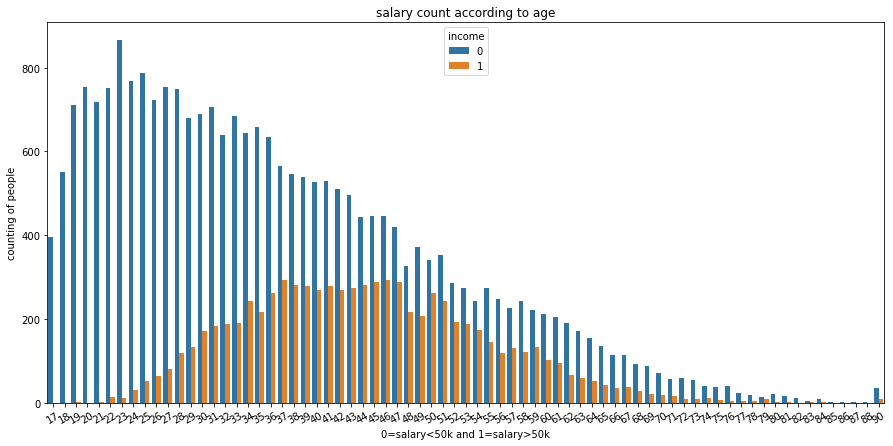

age  income
17   0         395
18   0         550
19   0         710
     1           2
20   0         753
              ... 
86   0           1
87   0           1
88   0           3
90   0          35
     1           8
Name: income, Length: 138, dtype: int64


In [40]:
plt.figure(figsize=(15,7))
sns.countplot(x="age",hue='income',data=df_income)
plt.title("salary count according to age")
plt.xlabel('0=salary<50k and 1=salary>50k')
plt.xticks(rotation=30)
plt.ylabel('counting of people')
plt.show()

print(df_income.groupby('age')['income'].value_counts())

In [41]:
df_income.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<AxesSubplot:>

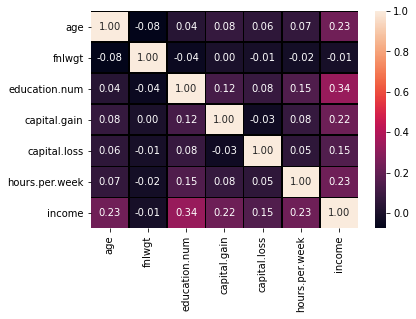

In [42]:
sns.heatmap(df_income.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='0.2f')

In [43]:
df_income.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


observation:
    1)age
    mean=38.58
    std=13.64
    median=37.00
    difference b/w 75thpercentile and max value is high ,outliers are present.
    mean is greater than median,hence the data is skewed
    
    2)fnlwgt
    mean=1.897784e+05
    std=1.055500e+05
    median=1.783560e+05
    difference b/w 75thpercentile and max value is high ,outliers are present
    
    3)education.num
    mean=10.080679
    std=2.572720
    median=10.000000
    mean is greater than median hence the data is right skewed
    
    4)capital.gain
    mean=1077.648844
    std=7385.292085
    median=0
    mean is greater than median hence the data is skewed,
    there is a large difference b/w 75thpercentile and max hence outliers are present.
    
    5)capital.loss
    mean=87.303830
    std=402.960219
    median=0
    mean is greater than median hence the data is skewed
    there is a large difference b/w 75th percentile and max hence outliers are present.
    
    6)hours.per.week
    mean=40.437456
    std=12.347429
    median=40.000000
    there is a large difference b/w 75th percentile and max hence outliers are present.
    

In [44]:
#checking skewness

In [45]:
df_income.skew()

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
income             1.212430
dtype: float64

observation:
    considering skewness to be +/-0.5
    we can see that fnlwgt,capital.gain,capital.loss has high skewness

In [46]:
#treating skewness via squareroot method and cube root method.
df_income.skew()
for col in df_income.skew().index:
    if col in df_income.describe().columns:
        if df_income[col].skew()>0.55:
            df_income[col]=np.sqrt(df_income[col])
        if df_income[col].skew()<-0.55:
            df_income[col]=np.cbrt(df_income[col])

# converting categorical data into numerical data

In [47]:
objList = df_income.select_dtypes(include = "object").columns
print (objList)

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')


In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for feat in objList:
    df_income[feat] = le.fit_transform(df_income[feat].astype(str))

In [49]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  int32  
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  int32  
 4   education.num   32561 non-null  int64  
 5   marital.status  32561 non-null  int32  
 6   occupation      32561 non-null  int32  
 7   relationship    32561 non-null  int32  
 8   race            32561 non-null  int32  
 9   sex             32561 non-null  int32  
 10  capital.gain    32561 non-null  float64
 11  capital.loss    32561 non-null  float64
 12  hours.per.week  32561 non-null  int64  
 13  native.country  32561 non-null  int32  
 14  income          32561 non-null  float64
dtypes: float64(5), int32(8), int64(2)
memory usage: 2.7 MB


here we can see that all the categorical values are converted into numerical values using label encoder.

# ploting Outliers

<AxesSubplot:>

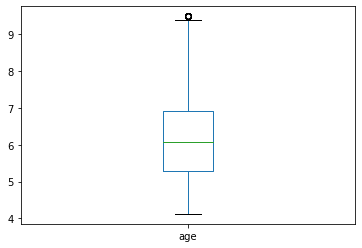

In [50]:
df_income['age'].plot.box()

<AxesSubplot:>

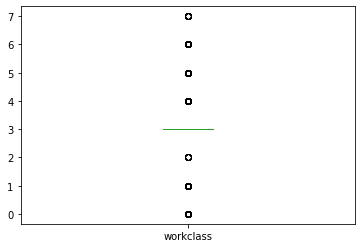

In [51]:
df_income['workclass'].plot.box()

<AxesSubplot:>

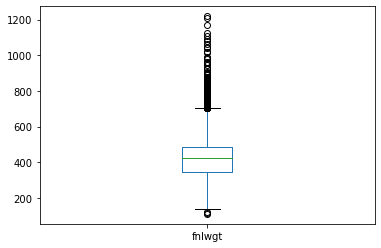

In [52]:
df_income['fnlwgt'].plot.box()

<AxesSubplot:>

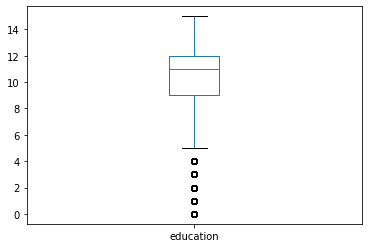

In [53]:
df_income['education'].plot.box()

<AxesSubplot:>

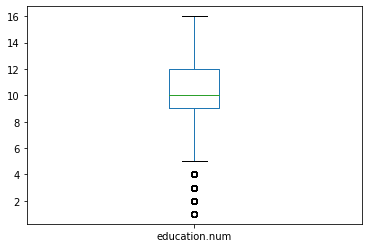

In [54]:
df_income['education.num'].plot.box()

<AxesSubplot:>

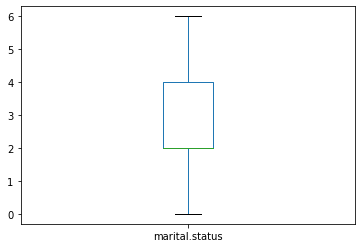

In [55]:
df_income['marital.status'].plot.box()

# Treating outliers by Z-score Technique

In [56]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_income))
threshold=3
np.where(z>3)

(array([    0,     0,     1, ..., 32536, 32552, 32554], dtype=int64),
 array([ 0, 11, 11, ...,  8,  8,  8], dtype=int64))

In [57]:
df_incomenew=df_income[(z<3).all(axis=1)]

In [58]:
print(df_income.shape,'\t\t',df_incomenew.shape)

(32561, 15) 		 (27555, 15)


# Model training

In [59]:
df_incomenew.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1491,8.306624,6,398.987468,15,10,6,0,1,4,0,0.0,28.460499,38,38,0.0
1492,8.062258,3,436.540949,11,9,6,0,1,4,0,0.0,28.460499,36,38,0.0
1493,7.549834,3,185.118881,11,9,6,13,4,4,1,0.0,25.553865,42,38,1.0
1494,6.480741,3,509.663615,9,13,0,9,4,4,1,0.0,25.553865,50,38,1.0
1495,7.000000,3,341.083567,11,9,5,9,4,4,0,0.0,25.553865,60,38,0.0


In [60]:
#splitting the data into input and output variable
x=df_incomenew.drop(columns=['income'],axis=1)
x.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1491,8.306624,6,398.987468,15,10,6,0,1,4,0,0.0,28.460499,38,38
1492,8.062258,3,436.540949,11,9,6,0,1,4,0,0.0,28.460499,36,38
1493,7.549834,3,185.118881,11,9,6,13,4,4,1,0.0,25.553865,42,38
1494,6.480741,3,509.663615,9,13,0,9,4,4,1,0.0,25.553865,50,38
1495,7.000000,3,341.083567,11,9,5,9,4,4,0,0.0,25.553865,60,38


In [61]:
y=df_incomenew['income']
y.head()

1491    0.0
1492    0.0
1493    1.0
1494    1.0
1495    0.0
Name: income, dtype: float64

In [62]:
#checking shape of input and output variable
print(x.shape,'\t\t',y.shape)

(27555, 14) 		 (27555,)


In [63]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 2.05350273e+00,  2.65122440e+00, -1.67627165e-01, ...,
         4.03806007e+01, -1.59809300e-01,  1.90806887e-01],
       [ 1.82870380e+00, -7.50962577e-02,  1.55679279e-01, ...,
         4.03806007e+01, -3.39099446e-01,  1.90806887e-01],
       [ 1.35731186e+00, -7.50962577e-02, -2.00887042e+00, ...,
         3.62535048e+01,  1.98770991e-01,  1.90806887e-01],
       ...,
       [ 2.30144758e-01, -7.50962577e-02, -2.19996232e-01, ...,
        -3.01276860e-02,  1.94808454e-02,  1.90806887e-01],
       [ 1.41797061e+00, -7.50962577e-02, -2.47100097e-01, ...,
        -3.01276860e-02,  1.94808454e-02,  1.90806887e-01],
       [-1.27314402e+00, -7.50962577e-02,  2.61877765e-01, ...,
        -3.01276860e-02, -1.77342061e+00,  1.90806887e-01]])

In [64]:
#splitting the data into training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20,stratify=y)

In [65]:
print(x_train.shape,'\t\t',x_test.shape)

(22044, 14) 		 (5511, 14)


In [66]:
print(y_train.shape,'\t\t',y_test.shape)

(22044,) 		 (5511,)


In [67]:
#importing all the Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

# Finding the best Paramerts

In [68]:
# using Gridsearch Cv to find best parametrs in logistic regression

parameters={'C':[1,10],'random_state':range(42,100)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 10, 'random_state': 42}


In [69]:
parameters={'n_neighbors':range(22,25)}
knn=KNeighborsClassifier()

clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 22}


In [70]:
#model with its best parameters
LR=LogisticRegression(random_state=42)
KNN=KNeighborsClassifier(n_neighbors=24)
SVC=SVC()

In [71]:
#all algorithms by using for loop
model=[LR,GaussianNB(),SVC,DecisionTreeClassifier(),KNN]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*******************************************************************************')
    print('\n')

Accuracy score of LogisticRegression(random_state=42) is:
0.8199963708945744
[[4094  251]
 [ 741  425]]
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      4345
         1.0       0.63      0.36      0.46      1166

    accuracy                           0.82      5511
   macro avg       0.74      0.65      0.68      5511
weighted avg       0.80      0.82      0.80      5511

*******************************************************************************


Accuracy score of GaussianNB() is:
0.7847940482671022
[[3455  890]
 [ 296  870]]
              precision    recall  f1-score   support

         0.0       0.92      0.80      0.85      4345
         1.0       0.49      0.75      0.59      1166

    accuracy                           0.78      5511
   macro avg       0.71      0.77      0.72      5511
weighted avg       0.83      0.78      0.80      5511

*******************************************************************************

In [73]:
#cross validate the models

models=[LR,GaussianNB(),SVC,DecisionTreeClassifier(),KNN]

for m in models:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print("Model:",m)
    print("score:",score)
    print("Mean score:",score.mean())
    print("standard deviation:",score.std())
    print('***********************************************************************')
    print('\n')

Model: LogisticRegression(random_state=42)
score: [0.65711176 0.85812772 0.81894049 0.80805515 0.82075472 0.81742287
 0.81742287 0.8185118  0.81705989 0.80907441]
Mean score: 0.8042481673379184
standard deviation: 0.05078679262663285
***********************************************************************


Model: GaussianNB()
score: [0.66509434 0.8287373  0.78809869 0.77939042 0.79317852 0.7800363
 0.79092559 0.78693285 0.79818512 0.79673321]
Mean score: 0.780731234146123
standard deviation: 0.0407321189659215
***********************************************************************


Model: SVC()
score: [0.68577649 0.81095791 0.83635704 0.83998549 0.8287373  0.8384755
 0.83774955 0.84900181 0.83774955 0.8261343 ]
Mean score: 0.819092493131633
standard deviation: 0.045478521907214506
***********************************************************************


Model: DecisionTreeClassifier()
score: [0.63969521 0.75616836 0.80442671 0.77975327 0.78809869 0.79346642
 0.80326679 0.78983666 0.79

from the above
SVC is the giving the best score
now applying ensemble techniques to boost performance

# using Ensemble Technique to boostup our score

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier



In [79]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*********************************************************************************************')
    print('\n')

accuracy score of RandomForestClassifier() is:
0.850662311740156
[[4053  292]
 [ 531  635]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      4345
         1.0       0.69      0.54      0.61      1166

    accuracy                           0.85      5511
   macro avg       0.78      0.74      0.76      5511
weighted avg       0.84      0.85      0.84      5511

*********************************************************************************************


accuracy score of AdaBoostClassifier() is:
0.8606423516603158
[[4116  229]
 [ 539  627]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      4345
         1.0       0.73      0.54      0.62      1166

    accuracy                           0.86      5511
   macro avg       0.81      0.74      0.77      5511
weighted avg       0.85      0.86      0.85      5511

*********************************************************************

In [100]:
#GradientBoostingClassifier with best result
gbc=GradientBoostingClassifier(learning_rate=0.1,random_state=59,n_estimators=200)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.8642714570858283
[[4112  233]
 [ 515  651]]
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      4345
         1.0       0.74      0.56      0.64      1166

    accuracy                           0.86      5511
   macro avg       0.81      0.75      0.78      5511
weighted avg       0.86      0.86      0.86      5511



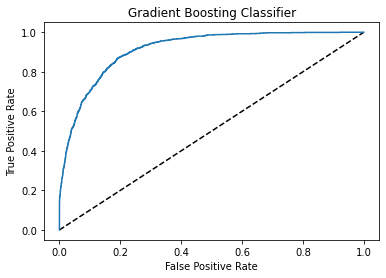

0.7523470916473065


In [102]:
#AUC_ROC curve and finding auc score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=gbc.predict_proba(x_test)[:,1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier')
plt.show()

auc_score=roc_auc_score(y_test,predgbc)
print(auc_score)

In [106]:
# saving the model
import joblib



In [107]:
joblib.dump(gbc,'Adult_income_gbc.pkl')

['Adult_income_gbc.pkl']